In [1]:
import pandas as pd
import numpy as np

In [2]:
S1=pd.read_csv("GDA_Similarity.csv")
#Temp matrix to calculate threshold values and similarity matrix to store the original values
temp=[]
similarity=[]
for row in S1.iterrows():
    index, data = row
    temp.append(data.tolist())
    similarity.append(data.tolist())
#sort list in a list
for i in temp:
    i=i.sort(reverse =True) 
#set k=10 finding 10 highest values
first_ten=pd.DataFrame(temp)

In [3]:
#keep 10 columns
threshold=first_ten[9]
# #keep 15 columns
threshold_15=first_ten[14]

In [ ]:
threshold

In [ ]:
threshold_15

In [4]:
#thresholding similarity matrix
thresh_matrix=np.array(threshold)
thresh_matrix_15=np.array(threshold_15)
s_matrix=[[0 for x in range(len(S1))] for y in range(len(S1))] 
s_matrix_15=[[0 for x in range(len(S1))] for y in range(len(S1))] 
for i in range(0,len(S1)):
    for j in range(0,len(S1)):
        #changing this to and seems to be splitting our data into many components. Checking by changing it to or &
        # keeping the change in laplacian
        #switching to and and keeping the laplacian yields the result
        #chek for keeping and but changin laplacian sum yields the same result
        if((similarity[i][j] >= thresh_matrix[i]) or (similarity[i][j] >= thresh_matrix[j])):
            s_matrix[i][j]=similarity[i][j]
        else:
            s_matrix[i][j]=0
        if((similarity[i][j] >= thresh_matrix_15[i]) or (similarity[i][j] >= thresh_matrix_15[j])):
            s_matrix_15[i][j]=similarity[i][j]
        else:
            s_matrix_15[i][j]=0

In [5]:
pd.DataFrame(s_matrix).to_csv("similarity_10_29August.csv")
pd.DataFrame(s_matrix_15).to_csv("similarity_15_29August.csv")

In [6]:
s_matrix=np.asarray(s_matrix)
if(s_matrix==s_matrix.T).all():
    print(True)
s_matrix_15=np.asarray(s_matrix_15)
if(s_matrix_15==s_matrix_15.T).all():
    print(True)

True
True


In [7]:
#laplacian matrix
laplacian= [[0 for x in range(len(S1))] for y in range(len(S1))] 
laplacian_15= [[0 for x in range(len(S1))] for y in range(len(S1))] 
#changing axis from 0 to 1
total_matrix=np.sum(s_matrix,axis=1)
total_matrix_15=np.sum(s_matrix_15,axis=1)
for i in range(len(S1)):
    for j in range(len(S1)):
        if(i==j):
            laplacian[i][j]=1
            laplacian_15[i][j]=1
        else:
            if total_matrix[i]==0.0:
                k=0.0;
            else:
                k=-s_matrix[i][j]/total_matrix[i]
            if total_matrix_15[i]==0.0:
                k_15=0.0;
            else:
                k_15=-s_matrix_15[i][j]/total_matrix_15[i]
            if k== -0.0:
                laplacian[i][j]=0.0
            else:
                laplacian[i][j]= k 
            if k_15== -0.0:
                laplacian_15[i][j]=0.0
            else:
                laplacian_15[i][j]= k_15
L=pd.DataFrame(laplacian)
L_15=pd.DataFrame(laplacian_15)

In [8]:
#np.dot(vector_new_df[1],vector_new_df[2])
lap=np.asarray(laplacian)
if(lap==lap.T).all():
    print(True)
else:
    print(False)

False


In [9]:
#calculating eigen values(w) and eigen vectors(v) in Laplacian matrix
val,vec=np.linalg.eig(laplacian)
val_15,vec_15=np.linalg.eig(laplacian_15)
#values to a dataframe
values=pd.DataFrame(val)
values_15=pd.DataFrame(val_15)

In [10]:
pd.options.display.float_format = '{:.5f}'.format

In [11]:
pd.options.display.float_format = '{:.5f}'.format
values.sort_values(by=[0], axis=0, ascending=True, inplace=True, kind='quicksort')
values.head(3)

,0
0,0.00000
1,0.00985
2,0.01420


In [12]:
values_15.sort_values(by=[0], axis=0, ascending=True, inplace=True, kind='quicksort')
values_15.head(3)

,0
0,0.00000
1,0.01194
2,0.01754


In [13]:
#eigen vectors for theabove eigen values
vector=pd.DataFrame(vec)
vector_15=pd.DataFrame(vec_15)

In [14]:
#Eigen vectors corresponding to second smallest eigen value
second_smallest_eigen_10=[[0] * i for i in range(len(S1))]
second_smallest_eigen_15=[[0] * i for i in range(len(S1))]
#Eigen vectors corresponding to second third eigen value
third_smallest_eigen_10=[[0] * i for i in range(len(S1))]
third_smallest_eigen_15=[[0] * i for i in range(len(S1))]
for i in range(len(S1)):
    second_smallest_eigen_10[i]=vector[1][i]
    second_smallest_eigen_15[i]=vector_15[1][i]
    third_smallest_eigen_10[i]=vector[2][i]
    third_smallest_eigen_15[i]=vector_15[2][i]

In [15]:
#checking for orthogonal vectors
print(np.dot(vector[1],vector[1].T))
# print(np.cross(vector_15[1],vector_15[2]))
# print(np.dot(vector[1],vector[2]))
# print(np.dot(vector_15[1],vector_15[2]))
# print(np.cross(vector[1],vector[2]))
# print(np.cross(vector_15[1],vector_15[2]))

1.0000000000000002


In [16]:
eigen=pd.read_csv("GDA_Smallarea.csv")
eigen.drop(['ogc_fid','fid','ogc_fid1','ogc_fid0'], axis=1, inplace=True)

In [17]:
#converting second and third smallest eigen vectors to dataframe
second_vector_10=pd.DataFrame(second_smallest_eigen_10)
second_vector_10.columns=['vector']
third_vector_10=pd.DataFrame(third_smallest_eigen_10)
third_vector_10.columns=['vector']
second_vector_15=pd.DataFrame(second_smallest_eigen_15)
second_vector_15.columns=['vector']
third_vector_15=pd.DataFrame(third_smallest_eigen_15)
third_vector_15.columns=['vector']

In [18]:
#Concatening two dataframes ie., Small area details(Name, SA ) and their corresponding eigen vector
frames=[eigen,second_vector_10]
second_smallest_10=pd.concat(frames,axis=1)
frames_1=[eigen,third_vector_10]
third_smallest_10=pd.concat(frames_1,axis=1)
frames_2=[eigen,second_vector_15]
second_smallest_15=pd.concat(frames,axis=1)
frames_3=[eigen,third_vector_15]
third_smallest_15=pd.concat(frames_1,axis=1)

In [19]:
#sort the dataframe by eigen vector values. The resultant displays Small areas with eigen vectors in descending order
second_eigen_places_10=pd.DataFrame()
second_eigen_places_10=second_smallest_10.sort_values(by=['vector'], axis=0, ascending=False, inplace=False, kind='quicksort')
second_eigen_places_10.to_csv('GDA_Second_eigen_10_29_Aug.csv', index=False)
second_eigen_places_15=pd.DataFrame()
second_eigen_places_15=second_smallest_15.sort_values(by=['vector'], axis=0, ascending=False, inplace=False, kind='quicksort')
second_eigen_places_15.to_csv('GDA_Second_eigen_15_29_Aug.csv', index=False)

In [20]:
#sort the dataframe by eigen vector values. The resultant displays Small areas with eigen vectors in descending order
third_eigen_places_10=pd.DataFrame()
third_eigen_places_10=third_smallest_10.sort_values(by=['vector'], axis=0, ascending=False, inplace=False, kind='quicksort')
third_eigen_places_10.to_csv('GDA_Third_eigen_10_29_Aug.csv', index=False)
third_eigen_places_15=pd.DataFrame()
third_eigen_places_15=third_smallest_15.sort_values(by=['vector'], axis=0, ascending=False, inplace=False, kind='quicksort')
third_eigen_places_15.to_csv('GDA_Third_eigen_15_29_Aug.csv', index=False)


In [21]:
#cluster maps for eigen vectors
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
#plt.style.use('ggplot')
x=[i for i in range(len(second_smallest_eigen_10))]
# fig, ax = plt.subplots()
plt.scatter(x, second_smallest_eigen_10,c="blue",s=1)
plt.scatter(x, third_smallest_eigen_10,c="red",s=1)
#plt.scatter(second_smallest_eigen_10,third_smallest_eigen_10)
plt.show()

<Figure size 1600x900 with 1 Axes>

[[-8.96606927e-03 -1.15424795e-02]
 [ 1.26924651e-02 -1.64720978e-03]
 [-2.01368350e-04  2.97658370e-02]
 [-2.50812259e-02 -1.48317888e-02]
 [ 5.77832339e-03 -1.05539629e-02]
 [-1.31760635e-02  2.49358653e-02]
 [-2.77426705e-02  1.41406587e-05]
 [ 5.67167654e-03  9.36240391e-03]]


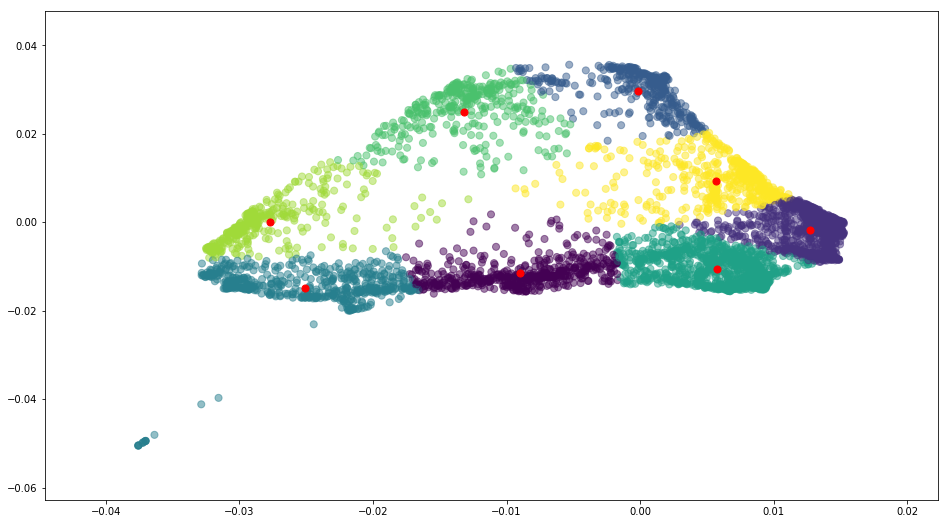

In [47]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (16, 9)
Data = [second_smallest_eigen_15,third_smallest_eigen_15]
df = pd.DataFrame(Data)
df=df.T
kmeans = KMeans().fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
df.columns=["Second","Third"]
#df
plt.scatter(df['Second'], df['Third'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [23]:
shape=pd.read_csv("GDA_Shape.csv")
frames=[shape,second_vector_10]
shape_vector_10_2=pd.concat(frames,axis=1)

In [24]:
shape_vector_10_2.columns

Index(['small_area', 'shape__are', 'shape__len', 'vector'], dtype='object')

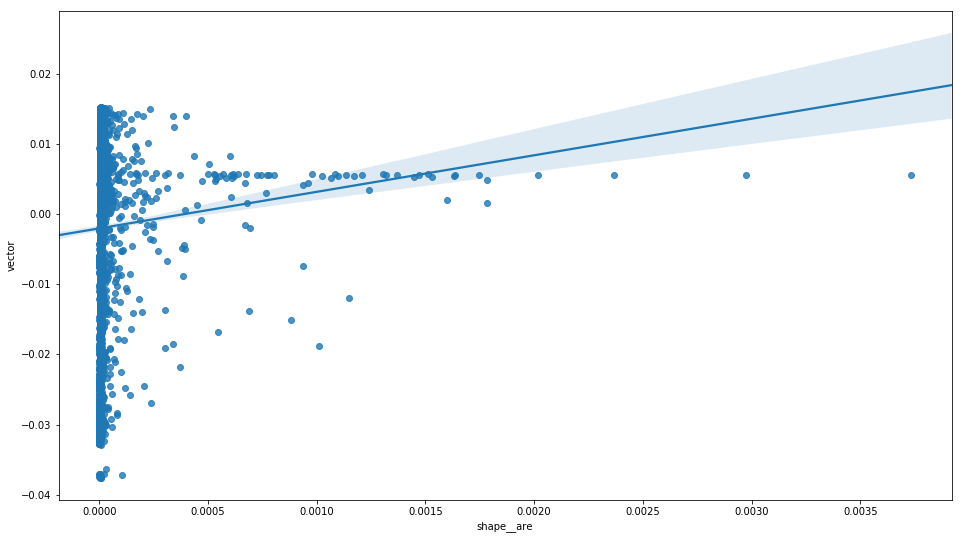

In [38]:
#shape_vector_10_2.plot.line('vector','shape__are')
import seaborn as sns
sns.regplot(shape_vector_10_2['shape__are'],shape_vector_10_2['vector'])

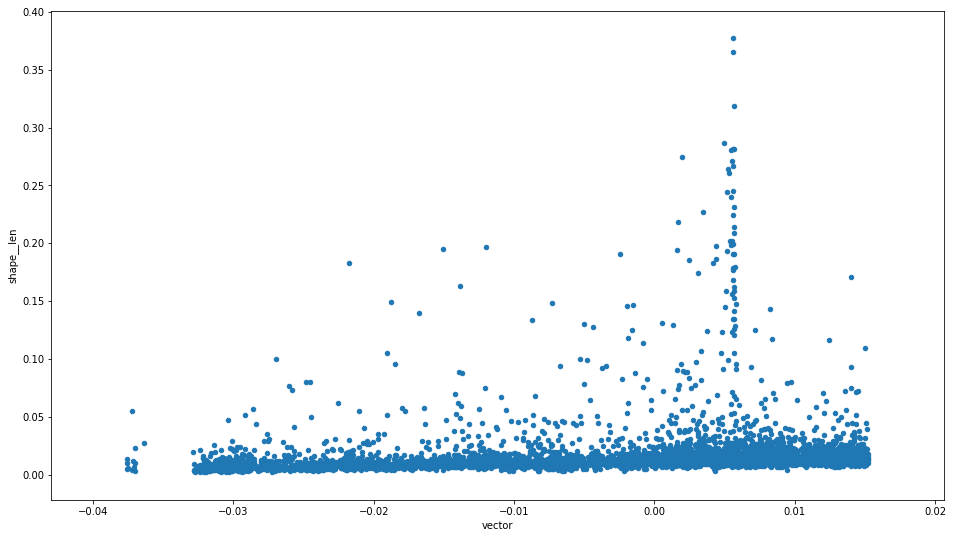

In [29]:
shape_vector_10_2.plot.scatter('vector','shape__len', s=None, c=None)